# Project 01 - Write a Data Science Blog Post

## Part 3: Data Modeling

### Data
 - NBA 2018-2019 Player Box Scores 
 - NBA 2018-2019 Daily Fantasy Scores (DFS)
 
### Business Questions
1. What are the key drivers for top fantasy scores?
2. What effect, if any, does seasonality play during the NBA season? 
3. Which positions are the most valuable from a fantasy score perspective? 

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

# Use FiveThirtyEight's style of graphs
style.use('fivethirtyeight')

# Use 2 decimal places in output display
pd.set_option("display.precision", 1)

In [2]:
os.chdir('../lib')

In [3]:
from helpers import get_feature_importance

### Import Data

In [4]:
os.chdir('../data')

In [5]:
df = pd.read_csv("Cleaned-Dummies_NBA1819_PlayerStats-DFS.csv")

# Dropping the DRAFTKINGS/FANDUEL columns in favor of YAHOO; unncessary columns
del_cols = ['Unnamed: 0','GAME-ID', 'DATE', 'PLAYER-ID', 'MIN',
            'DRAFTKINGS_FANTASYPOINTS', 'FANDUEL_FANTASYPOINTS',
            'DRAFTKINGS_CLASSIC_SALARY', 'FANDUEL_FULLROSTER_SALARY',
            'YAHOO_FULLSLATE_SALARY']

df.drop(del_cols, axis=1, inplace=True)
df.head()

,MINUTES,USAGE RATE,DAYSREST,YAHOO_FANTASYPOINTS,FG,FGA,3P,3PA,FT,FTA,...,POSITION_C,POSITION_F,POSITION_F-C,POSITION_G,POSITION_G-F,POSITION_PF,POSITION_PG,POSITION_SF,POSITION_SG,POSITION_Unknown
0,22.9,20.4,4,11.7,3,8,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,34.2,14.9,4,22.2,3,10,2,7,0,0,...,0,0,0,0,0,0,0,1,0,0
2,36.8,32.5,4,42.0,9,21,1,4,4,5,...,1,0,0,0,0,0,0,0,0,0
3,24.3,19.0,4,11.6,2,7,0,0,1,2,...,0,0,0,0,0,0,1,0,0,0
4,42.7,21.3,4,64.0,7,14,0,0,5,10,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#df.info(verbose=True, null_counts=True)

In [7]:
pos_df = df.filter(regex='POSITION')
pos_df.head()

,POSITION_C,POSITION_F,POSITION_F-C,POSITION_G,POSITION_G-F,POSITION_PF,POSITION_PG,POSITION_SF,POSITION_SG,POSITION_Unknown
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [8]:
player_df = df.filter(regex='PLAYER')
player_df.head()

,PLAYER_Aaron Gordon,PLAYER_Aaron Holiday,PLAYER_Abdel Nader,PLAYER_Al Horford,PLAYER_Al-Farouq Aminu,PLAYER_Alan Williams,PLAYER_Alec Burks,PLAYER_Alex Abrines,PLAYER_Alex Caruso,PLAYER_Alex Len,...,PLAYER_Wilson Chandler,PLAYER_Yante Maten,PLAYER_Yogi Ferrell,PLAYER_Yuta Watanabe,PLAYER_Zach Collins,PLAYER_Zach LaVine,PLAYER_Zach Lofton,PLAYER_Zaza Pachulia,PLAYER_Zhaire Smith,PLAYER_Zhou Qi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [9]:
# Split into explanatory and response variables
X = df.drop('YAHOO_FANTASYPOINTS', axis=1) #player_df #pos_df 
y = df['YAHOO_FANTASYPOINTS']

In [10]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Fit standard scaler to training set
standardscaler = StandardScaler()
standardscaler.fit(X_train)

# Transform the feature variables
X_train_std = standardscaler.transform(X_train)
X_test_std = standardscaler.transform(X_test)

### Instantiate Model

In [12]:
# Instantiate the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_std, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
# Predict and score the model
y_test_preds = rf_regressor.predict(X_test_std)

"The R-squared score for the model using the quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The R-squared score for the model using the quantitative variables was 0.9861373295405361 on 8357 values.'

#### Feature Importance

In [14]:
X_colnames = df.drop(['YAHOO_FANTASYPOINTS'], axis=1).columns
pos_colnames = pos_df.columns
player_colnames = player_df.columns

top_features = get_feature_importance(rf_regressor, X_colnames, num_features=10)
top_features

,Feature,Importance
0,PTS,7.5e-01
1,TOT,1.0e-01
2,A,5.3e-02
3,ST,3.8e-02
4,BL,2.7e-02
5,MINUTES,1.5e-02
6,TO,2.8e-03
7,DR,2.5e-03
8,USAGE RATE,1.5e-03
9,FGA,1.2e-03


In [15]:
top_features.replace({
    'PTS':'Points',
    'TOT':'Total Rebounds',
    'A':'Assists',
    'ST':'Steals',
    'BL':'Blocks',
    'TO':'Turnovers',
    'DR':'Defensive Rebounds',
    'FGA':'Field Goal Attempts'
}, inplace=True)

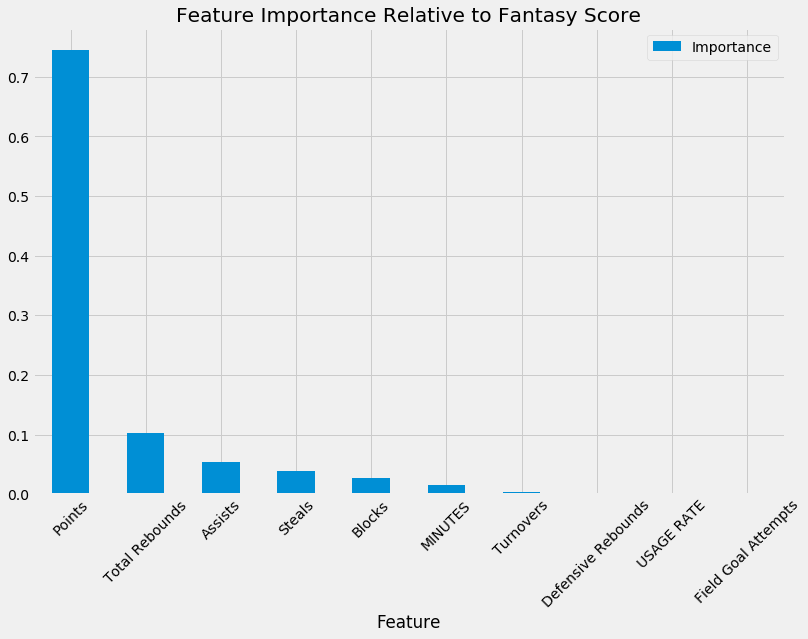

In [16]:
top_features.plot(x='Feature', y='Importance', kind='bar', figsize=(12,8), title='Feature Importance Relative to Fantasy Score', rot=45)

#### Findings: 

By using "Yahoo Fantasy Score" as our response variable and the rest of the preprocessed columns as explanatory variables, we have concluded that the most important features to predict "Yahoo Fantasy Score" were the basic box scores. From most important to least:
1. Points
2. Total Rebounds
3. Assists
4. Steals
5. Blocks
6. Minutes

By looking at just the positions as explanatory variables, we have concluded that the most valuable positions, on average, contributing to overall fantasy score seems to be:
1. Centers
2. Point Guards
3. Power Forwards
4. Shooting Guards
5. Small Forwards